---
# Distribución Binomial

---

La **distribución binomial** modela el número de **éxitos** en una secuencia de **ensayos independientes** de Bernoulli, donde cada ensayo tiene dos posibles resultados: **éxito** o **fracaso**, y la probabilidad de éxito es constante en cada ensayo.

---

## Características de la distribución binomial:
- **n**: Número de ensayos.
- **p**: Probabilidad de éxito en un solo ensayo.
- **k**: Número de éxitos en los \(n\) ensayos.

---

## Fórmula de la Distribución Binomial
La probabilidad de obtener exactamente \(k\) éxitos en \(n\) ensayos, con probabilidad \(p\) de éxito en cada ensayo, está dada por la fórmula:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

donde:
- $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ es el **coeficiente binomial**, que representa el número de formas de seleccionar \(k\) éxitos de un total de \(n\) ensayos.

---

## Propiedades:
- **Esperanza (media)**:

$$
E[X] = n \cdot p
$$

- **Varianza**:

$$
\text{Var}(X) = n \cdot p \cdot (1 - p)
$$

- **Desviación estándar**:

$$
\sigma = \sqrt{n \cdot p \cdot (1 - p)}
$$

---

## Ejemplo sencillo:
Imagina que lanzas una moneda 10 veces (\(n = 10\)) y la probabilidad de que salga cara en cada lanzamiento es \(p = 0.5\). La pregunta es: ¿cuántas veces esperamos que salga cara en 10 lanzamientos? Esto sigue una distribución binomial.

---



In [1]:
# Importando las librerías necesarias
import math
import numpy as np
import matplotlib.pyplot as plt

# Estilo de fondo oscuro
plt.style.use('dark_background')

In [2]:
# Parámetros de la distribución Binomial
n = 10   # Número de ensayos
p = 0.5  # Probabilidad de éxito (por ejemplo, lanzar una moneda justa)
size = 1000  # Número de experimentos

In [3]:
# TEORICO
## P(X=k) = (n!/(k!(n-k)!)) * p^k * (1-p)^(n-k)

def probabilidad_binomial(n, k, p):
    """
    Calcula la probabilidad de obtener k éxitos en n ensayos
    con probabilidad p de éxito en cada ensayo.
    """
    # Cálculo del coeficiente binomial
    coef_binom = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    # Cálculo de la probabilidad
    prob = coef_binom * (p ** k) * ((1 - p) ** (n - k))
    return prob

#print(probabilidad_binomial(10,5, 0.5))  # Ejemplo: P(X=3) con n=10 y p=0.5

def distribucion_binomial_teorica(n, p, size):
    """
    Genera una distribución binomial teórica.
    """
    x = np.arange(0, n + 1)
    probabilidades = [probabilidad_binomial(n, k, p) for k in x]
    probabilidades = [p * size for p in probabilidades]  # Escalamos las probabilidades por el tamaño de la muestra
    #print(f"Probabilidades: {probabilidades}")
    return x, probabilidades

#print(distribucion_binomial_teorica(10, 0.5, 1000))  # Ejemplo: n=10, p=0.5

------ medidas teóricas ------
Esperanza (media):  5.0
Varianza:  2.5
Desviación estándar:  1.5811388300841898

------ medidas de la simulación ------
media: 4.973
varianza: 2.5022710000000004
desviacion estandar: 1.581856820322244

----- resultados ------
Resultado: 0, Frecuencia: 3
Resultado: 1, Frecuencia: 10
Resultado: 2, Frecuencia: 46
Resultado: 3, Frecuencia: 104
Resultado: 4, Frecuencia: 220
Resultado: 5, Frecuencia: 255
Resultado: 6, Frecuencia: 198
Resultado: 7, Frecuencia: 108
Resultado: 8, Frecuencia: 44
Resultado: 9, Frecuencia: 12


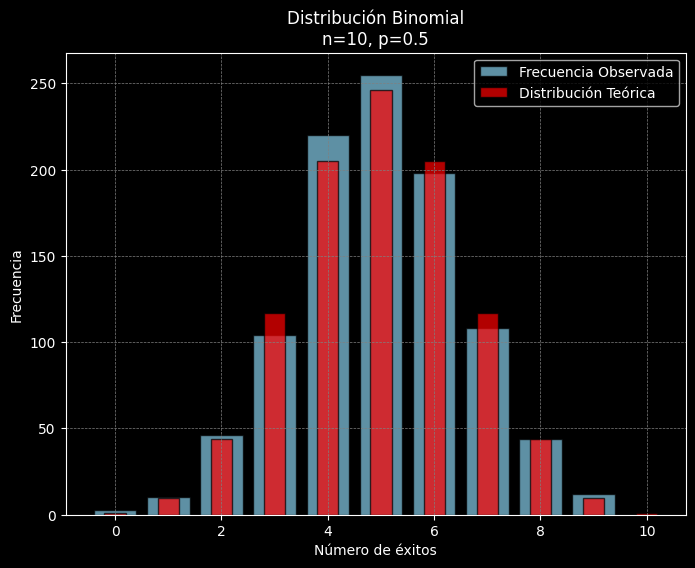

In [6]:
# Definimos la función para lanzar una moneda
def lanzarMoneda(p):
    return 1 if np.random.rand() < p else 0

# Definimos la función para realizar un experimento de lanzar una moneda n veces
def experimentar(n, p):
    res = []
    for i in range(n):
        res.append(lanzarMoneda(p))
    result = np.unique(res, return_counts=True)
    if len(result[0]) == 1:
        if result[0] == 1:
            return result[1][0]
        else:
            return n-result[1][0]
    return result[1][1]

# Definimos la función para realizar un conjunto de experimentos
def conjuntoDeResultados(n, p, size):
    res = []
    for i in range(size):
        res.append(experimentar(n, p))
    return np.array(res)

# Definimos la función para contar las frecuencias de los resultados
def contadorDeFrecuencias(n, p, size):
    res = conjuntoDeResultados(n, p, size)
    return (np.unique(res, return_counts=True),res)

frec, resultados = contadorDeFrecuencias(n, p, size)
valores = frec[0]
frecuencias = frec[1]

# medidas
print ("------ medidas teóricas ------")
E = n * p  # Esperanza
Var = n * p * (1 - p)  # Varianza
sigma = np.sqrt(Var)  # Desviación estándar

print('Esperanza (media): ', E)
print('Varianza: ', Var)
print('Desviación estándar: ', sigma)

#medidas de la simulación
print ("\n------ medidas de la simulación ------")
media = np.mean(resultados) # Media
varianza = np.var(resultados)  # Varianza
desviacion_estandar = np.std(resultados)  # Desviación estándar

print('media:', media)
print('varianza:', varianza)
print('desviacion estandar:', desviacion_estandar)

# Mostramos las frecuencias
print('\n----- resultados ------')
for valor, frecuencia in zip(valores, frecuencias):
   print(f"Resultado: {valor}, Frecuencia: {frecuencia}")
# Generando la distribución binomial teórica
valores_teoricos, probabilidades_teoricas = distribucion_binomial_teorica(n, p, size)
# Graficando los resultados
plt.figure(figsize=(8, 6))
plt.bar(valores, frecuencias, color='skyblue', edgecolor='black',alpha=0.7, label='Frecuencia Observada', width=0.8)
plt.bar(valores_teoricos, probabilidades_teoricas, color='red', edgecolor='black', alpha=0.7, label='Distribución Teórica', width=0.4)
plt.title(f"Distribución Binomial\nn={n}, p={p}")
plt.xlabel('Número de éxitos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

------ medidas teóricas ------
Esperanza (media):  5.0
Varianza:  2.5
Desviación estándar:  1.5811388300841898

------ medidas de la simulación ------
media: 4.939
varianza: 2.3472789999999994
desviacion estandar: 1.5320832222826537

----- resultados ------
Resultado: 0, Frecuencia: 1
Resultado: 1, Frecuencia: 6
Resultado: 2, Frecuencia: 46
Resultado: 3, Frecuencia: 123
Resultado: 4, Frecuencia: 215
Resultado: 5, Frecuencia: 247
Resultado: 6, Frecuencia: 213
Resultado: 7, Frecuencia: 102
Resultado: 8, Frecuencia: 39
Resultado: 9, Frecuencia: 7
Resultado: 10, Frecuencia: 1


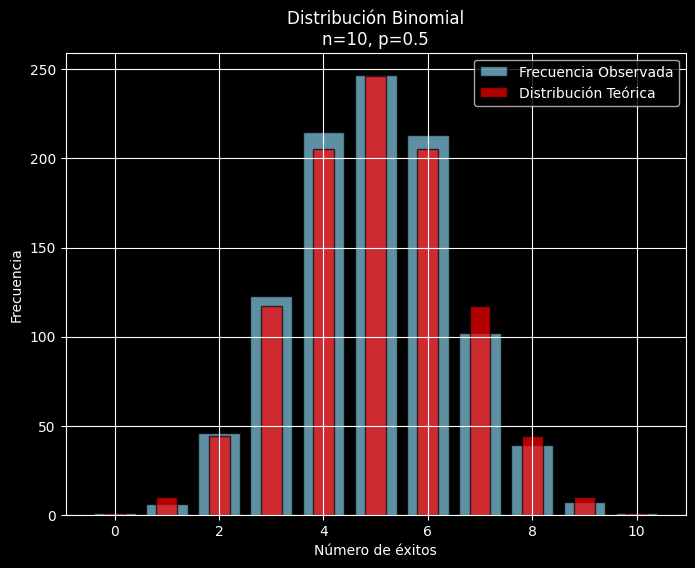

In [5]:
# Utilizando la función de numpy para generar la distribución binomial
# Generando los resultados de los ensayos binomiales
resultados2 = np.random.binomial(n, p, size)

# Contamos las frecuencias de los distintos resultados
valores, frecuencias = np.unique(resultados2, return_counts=True)

# medidas
print ("------ medidas teóricas ------")
E = n * p  # Esperanza
Var = n * p * (1 - p)  # Varianza
sigma = np.sqrt(Var)  # Desviación estándar

print('Esperanza (media): ', E)
print('Varianza: ', Var)
print('Desviación estándar: ', sigma)

#medidas de la simulación
print ("\n------ medidas de la simulación ------")
media = np.mean(resultados2) # Media
varianza = np.var(resultados2)  # Varianza
desviacion_estandar = np.std(resultados2)  # Desviación estándar

print('media:', media)
print('varianza:', varianza)
print('desviacion estandar:', desviacion_estandar)

# Mostramos las frecuencias
print('\n----- resultados ------')
for valor, frecuencia in zip(valores, frecuencias):
    print(f"Resultado: {valor}, Frecuencia: {frecuencia}")

# Graficando los resultados
plt.figure(figsize=(8, 6))
plt.bar(valores, frecuencias, color='skyblue', edgecolor='black', alpha=0.7, label='Frecuencia Observada', width=0.8)
plt.bar(valores_teoricos, probabilidades_teoricas, color='red', edgecolor='black', alpha=0.7, label='Distribución Teórica', width=0.4)
plt.title(f"Distribución Binomial\nn={n}, p={p}")
plt.xlabel('Número de éxitos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()